In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# let us understand the data how it available
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Preprocessing

In [7]:
# checking for null values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


we can see that there are no null values in our dataset

In [8]:
# Check distribution of target variable (wine quality)
df["quality"].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


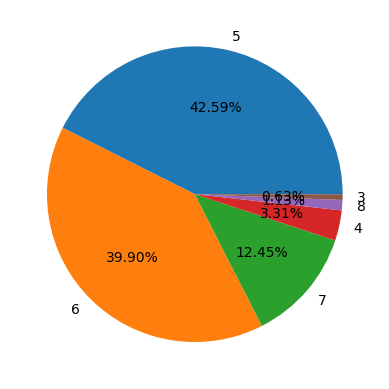

In [14]:
plt.pie(df["quality"].value_counts(), labels=df["quality"].value_counts().index, autopct="%1.2f%%")
plt.show()

In [15]:
# Convert quality scores into 3 categories
df["quality"] = df["quality"].apply(lambda x: 0 if x <= 4 else (1 if x <= 6 else 2))

In [16]:
# Check updated class distribution
df["quality"].value_counts()

,count
quality,
1,1319
2,217
0,63


In [17]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop("quality", axis=1)  # All columns except "quality"
y = df["quality"]  # Target variable

In [18]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
# Check dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

# Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

In [21]:
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

In [22]:
# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Model Building

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Hidden Layer 1
    Dense(8, activation='relu'),  # Hidden Layer 2
    Dense(len(np.unique(y_train)), activation='softmax')  # Output Layer (softmax for multiclass)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Sparse categorical loss for integer labels
    metrics=['accuracy']
)

In [25]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355 (1.39 KB)

 Trainable params: 355 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [26]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,  # Training data
    validation_data=(X_test_scaled, y_test),  # Validation data
    epochs=50,  # Number of training iterations
    batch_size=32,  # Number of samples per gradient update
    verbose=1  # Show training progress
)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5122 - loss: 1.0387 - val_accuracy: 0.8094 - val_loss: 0.8389
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8374 - loss: 0.7868 - val_accuracy: 0.8313 - val_loss: 0.6875
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8415 - loss: 0.6566 - val_accuracy: 0.8344 - val_loss: 0.6088
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8481 - loss: 0.5621 - val_accuracy: 0.8375 - val_loss: 0.5673
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8411 - loss: 0.5428 - val_accuracy: 0.8344 - val_loss: 0.5455
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8375 - loss: 0.5276 - val_accuracy: 0.8375 - val_loss: 0.5281
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8232 - loss: 0.5293 - val_accuracy: 0.8375 - val_loss: 0.5160
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8440 - loss: 0.4745 - val_accuracy: 0.8438 - val_loss

# Model Evaluation

In [27]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)

# Print results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8432 - loss: 0.4408 
Test Loss: 0.4346
Test Accuracy: 0.8531


In [28]:
# Make predictions on test data
y_pred_probabilities = model.predict(X_test_scaled)  # Get probability scores
y_pred = np.argmax(y_pred_probabilities, axis=1)  # Convert to class labels

# Print some predictions
print("Sample Predictions:", y_pred[:10])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Sample Predictions: [2 1 1 1 1 1 1 1 1 1]
